In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import calendar

In [52]:
df = pd.read_csv('./raw_data/data.csv')

In [53]:
df.sample(5)

valence  year  acousticness                    artists  danceability  \
167275    0.730  2004        0.1430  ['Slum Village', 'Dwele']         0.789   
123068    0.443  2011        0.0201         ['Mumford & Sons']         0.380   
7755      0.399  1960        0.7690            ['Sonny Stitt']         0.638   
8339      0.749  1963        0.7500          ['Elvis Presley']         0.380   
25563     0.206  1954        0.9200              ['Doris Day']         0.357   

        duration_ms  energy  explicit                      id  \
167275       273880   0.637         1  1l7RyfwJeCGt8pZ9lQWz9C   
123068       221093   0.656         0  1NiaRGKtWwIkKoz2nwBxbV   
7755         357520   0.214         0  1Eml72eKmu7dIa90d9IpQf   
8339         114200   0.638         0  366wRPrx2airjcCRkxgoS2   
25563        198307   0.115         0  6uVlj3TvVeTF1KN86pPmu5   

        instrumentalness  key  liveness  loudness  mode  \
167275          0.000000    1    0.1110    -9.082     0   
123068          0.000003    9    0.9760   -12.719     1   
7755            0.000000    3    0.0982   -14.185     1   
8339            0.000000    3    0.2580    -9.647     0   
25563           0.000025    2    0.3470   -13.354     1   

                                                     name  popularity  \
167275                                     Count The Ways          41   
123068  Feel the Tide - Live from Shepherd's Bush Empi...          45   
7755                                   Birth Of The Blues          34   
8339                                            Surrender          52   
25563                                     Darn That Dream          14   

       release_date  speechiness    tempo  
167275   2004-01-01       0.3840   95.104  
123068   2011-10-24       0.0568  136.453  
7755     1960-01-01       0.0532  116.426  
8339     1963-08-11       0.0504   79.125  
25563    1954-04-01       0.0316   67.757

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [13]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_month'] = df['release_month'].apply(lambda x : calendar.month_name[x])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   valence           170653 non-null  float64       
 1   year              170653 non-null  int64         
 2   acousticness      170653 non-null  float64       
 3   artists           170653 non-null  object        
 4   danceability      170653 non-null  float64       
 5   duration_ms       170653 non-null  int64         
 6   energy            170653 non-null  float64       
 7   explicit          170653 non-null  int64         
 8   id                170653 non-null  object        
 9   instrumentalness  170653 non-null  float64       
 10  key               170653 non-null  int64         
 11  liveness          170653 non-null  float64       
 12  loudness          170653 non-null  float64       
 13  mode              170653 non-null  int64         
 14  name

In [16]:
columns_to_drop = ['id']
df.drop(columns = columns_to_drop, inplace = True)

In [18]:
df.sample(5)

valence  year  acousticness                                artists  \
76980     0.000  1941        0.6610                      ['Alfred Newman']   
110248    0.588  1947        0.9950                ['Zohrabai Ambalawali']   
21860     0.940  1935        0.8290  ['Sylvia de Grasse', 'Avelino Muñoz']   
135562    0.715  1994        0.1490                           ['Ice Cube']   
17915     0.397  2011        0.0869   ['Dr. Dre', 'Eminem', 'Skylar Grey']   

        danceability  duration_ms  energy  explicit  instrumentalness  key  \
76980          0.000        14840   0.717         0          0.896000   10   
110248         0.591       156848   0.155         0          0.097500    5   
21860          0.793       165956   0.514         0          0.000115    7   
135562         0.477       267893   0.555         1          0.367000    6   
17915          0.594       283733   0.946         1          0.000000    3   

        liveness  loudness  mode                            name  popularity  \
76980     0.0538    -8.751     1   Twentieth Century Fox Fanfare           0   
110248    0.4240    -8.238     0  Dekhi Teri Duniya O Duniyawalo           0   
21860     0.2640   -11.042     1           Cada Loco Con Su Tema           0   
135562    0.4500    -9.757     0       It Was A Good Day - Remix          41   
17915     0.3060    -4.521     1                 I Need A Doctor          71   

       release_date  speechiness    tempo  release_year release_month  
76980    1941-01-01       0.0000    0.000          1941       January  
110248   1947-12-31       0.1170  116.365          1947      December  
21860    1935-01-01       0.0638   98.791          1935       January  
135562   1994-11-22       0.0523  159.431          1994      November  
17915    2011-02-01       0.4520  155.826          2011      February

In [19]:
df.duplicated().value_counts()

False    170107
True        546
dtype: int64

In [20]:
df.drop_duplicates(inplace = True)

df.duplicated().value_counts()

False    170107
dtype: int64

#### EDA

In [21]:
sns.set_palette('BuGn_r')
sns.set_style('darkgrid')

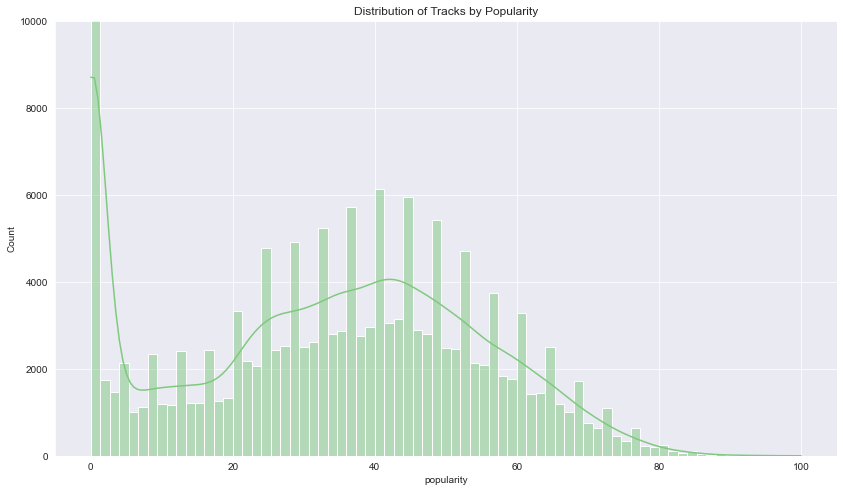

In [57]:
plt.figure(figsize = (14,8))
sns.histplot(df['popularity'], kde = True)
plt.title('Distribution of Tracks by Popularity')
plt.ylim(0, 10000)
plt.show()

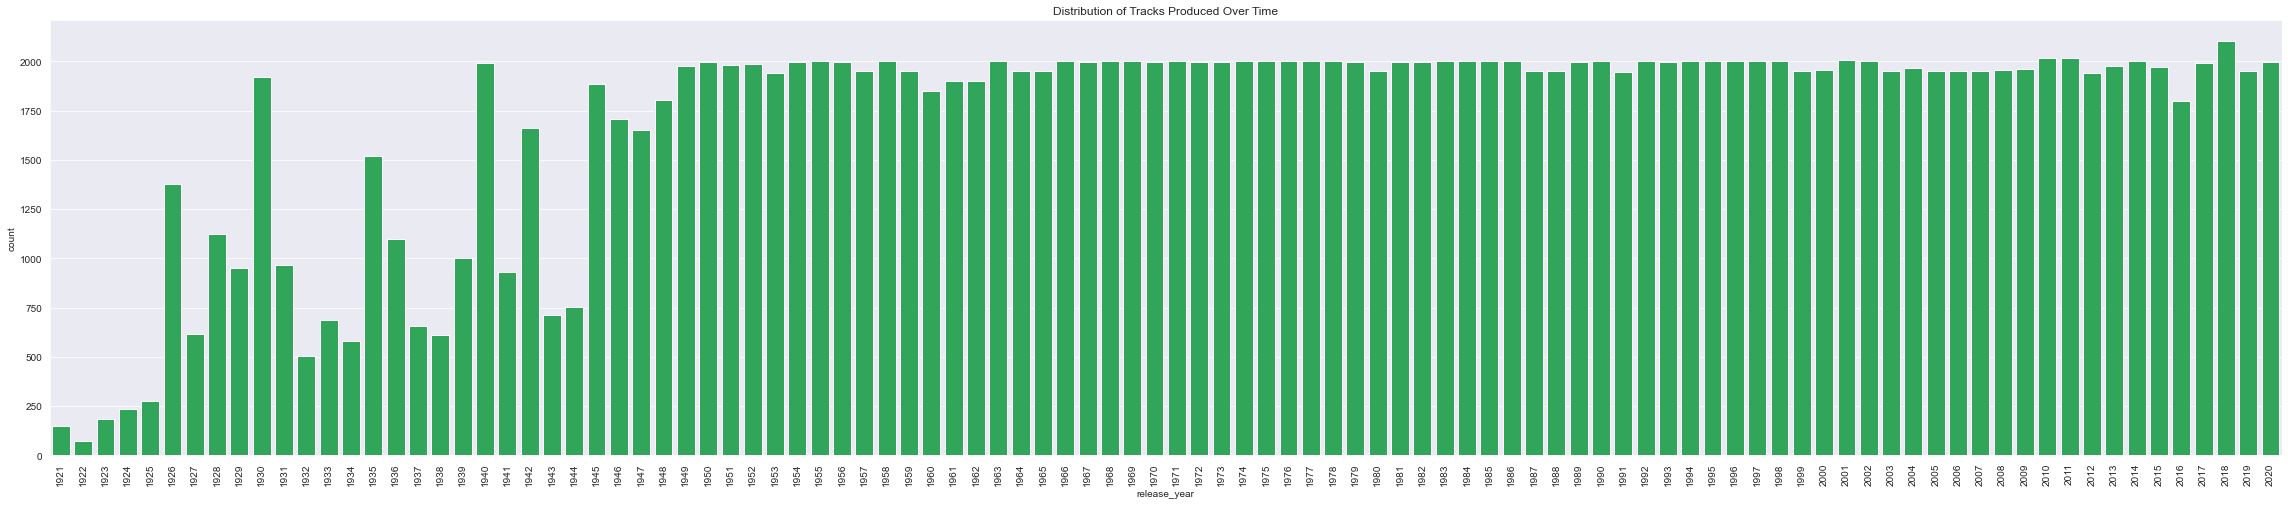

In [28]:
plt.figure(figsize = (40, 8))
sns.countplot(data = df, x = 'release_year', color = '#1DB954')
plt.title('Distribution of Tracks Produced Over Time')
plt.xticks(rotation = 90)
plt.show()

In [29]:
df.describe([.01,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

valence           year   acousticness   danceability  \
count  170107.000000  170107.000000  170107.000000  170107.000000   
mean        0.529250    1976.879411       0.500881       0.537842   
std         0.262954      25.876462       0.375729       0.176021   
min         0.000000    1921.000000       0.000000       0.000000   
1%          0.037800    1926.000000       0.000055       0.129060   
10%         0.157000    1941.000000       0.009360       0.296000   
20%         0.267000    1952.000000       0.057000       0.382000   
30%         0.362000    1960.000000       0.159000       0.446000   
40%         0.455000    1969.000000       0.316000       0.500000   
50%         0.540000    1978.000000       0.514000       0.548000   
60%         0.623000    1986.000000       0.701000       0.596000   
70%         0.705000    1995.000000       0.837000       0.643000   
80%         0.792000    2003.000000       0.935000       0.696000   
90%         0.887000    2012.000000       0.983000       0.760000   
99%         0.968000    2020.000000       0.995000       0.894000   
max         1.000000    2020.000000       0.996000       0.988000   

        duration_ms         energy       explicit  instrumentalness  \
count  1.701070e+05  170107.000000  170107.000000     170107.000000   
mean   2.309708e+05       0.483212       0.084841          0.165715   
std    1.259672e+05       0.267378       0.278645          0.312319   
min    5.108000e+03       0.000000       0.000000          0.000000   
1%     6.228000e+04       0.020400       0.000000          0.000000   
10%    1.354000e+05       0.130000       0.000000          0.000000   
20%    1.610400e+05       0.215000       0.000000          0.000000   
30%    1.779600e+05       0.297000       0.000000          0.000002   
40%    1.923330e+05       0.384000       0.000000          0.000021   
50%    2.074930e+05       0.472000       0.000000          0.000210   
60%    2.262836e+05       0.561000       0.000000          0.002210   
70%    2.490000e+05       0.657000       0.000000          0.027000   
80%    2.794286e+05       0.754000       0.000000          0.314000   
90%    3.366130e+05       0.865000       0.000000          0.836000   
99%    6.580874e+05       0.978000       1.000000          0.950000   
max    5.403500e+06       1.000000       1.000000          1.000000   

                 key       liveness       loudness           mode  \
count  170107.000000  170107.000000  170107.000000  170107.000000   
mean        5.199545       0.205897     -11.444755       0.707002   
std         3.514919       0.174868       5.678001       0.455139   
min         0.000000       0.000000     -60.000000       0.000000   
1%          0.000000       0.039100     -28.666940       0.000000   
10%         0.000000       0.073400     -19.019000       0.000000   
20%         1.000000       0.091500     -15.739000       0.000000   
30%         2.000000       0.105000     -13.609000       1.000000   
40%         4.000000       0.116000     -12.010000       1.000000   
50%         5.000000       0.136000     -10.563000       1.000000   
60%         7.000000       0.167000      -9.197000       1.000000   
70%         7.000000       0.222000      -7.846000       1.000000   
80%         9.000000       0.304000      -6.507000       1.000000   
90%        10.000000       0.404000      -5.054000       1.000000   
99%        11.000000       0.921000      -2.777000       1.000000   
max        11.000000       1.000000       3.855000       1.000000   

          popularity    speechiness          tempo   release_year  
count  170107.000000  170107.000000  170107.000000  170107.000000  
mean       31.527262       0.098517     116.895493    1976.879411  
std        21.791458       0.162947      30.697188      25.876462  
min         0.000000       0.000000       0.000000    1921.000000  
1%          0.000000       0.025500      62.904780    1926.000000  
10%         0.000000       0.030100      79.58100

In [30]:
track_attributes = ["popularity","acousticness",
                    "danceability", 
                    "energy", 
                    "duration_ms", 
                    "instrumentalness", 
                    "valence", 
                    "tempo", 
                    "liveness", 
                    "loudness", 
                    "speechiness"]

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

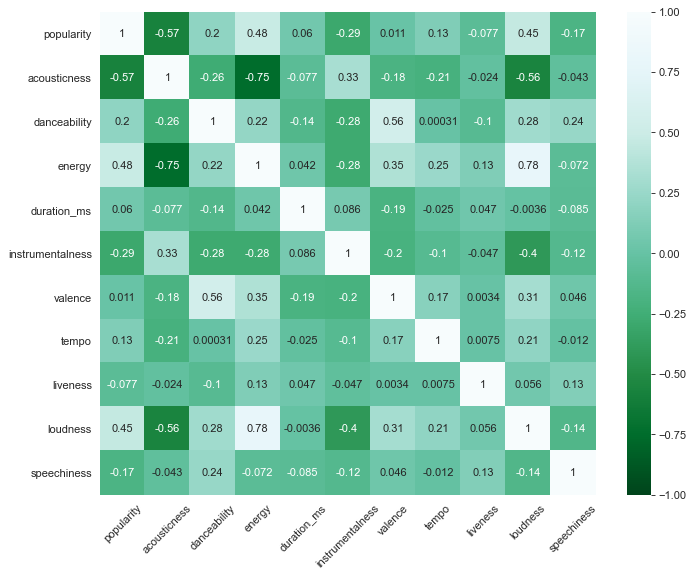

In [49]:
plt.figure(figsize = (10,8), dpi = 80)
sns.heatmap(df[track_attributes].corr(),vmin=-1, vmax=1, annot=True, cmap = 'BuGn_r' )
plt.xticks(rotation = 45)
plt.show()

In [33]:
corr_vars = ['danceability', 'energy', 'loudness']

list(enumerate(corr_vars))

[(0, 'danceability'), (1, 'energy'), (2, 'loudness')]

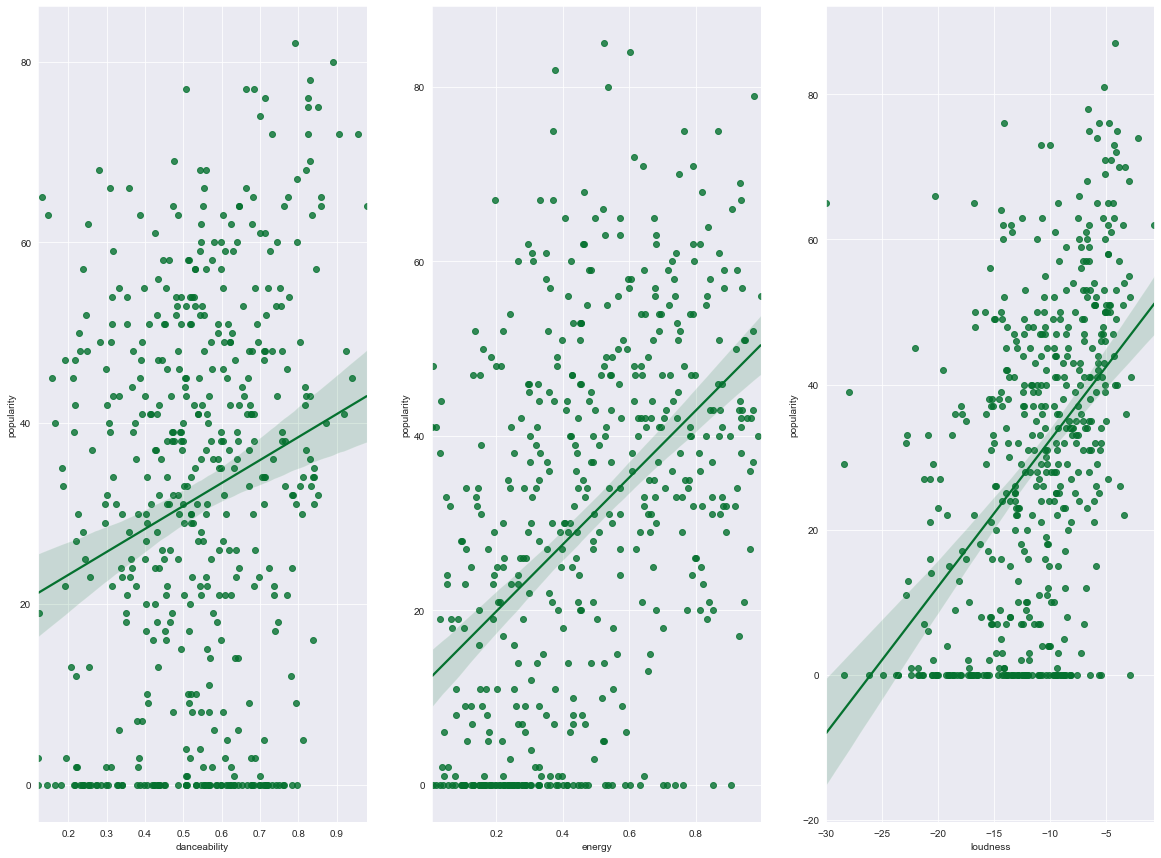

In [34]:
plt.figure(figsize = (20, 15))

for i in enumerate(corr_vars):
    plt.subplot(1,3,i[0]+1)
    sns.regplot(data = df.sample(500), y = 'popularity', x = i[1])
plt.show()

In [35]:
popular_songs = df[df['popularity'] >= 80]

print(popular_songs.shape)

popular_songs.sample(10)

(688, 20)


valence  year  acousticness                        artists  \
19790    0.453  2020       0.02100                  ['Bad Bunny']   
19687    0.874  2020       0.00824        ['Megan Thee Stallion']   
19180    0.510  2017       0.04030                   ['Dua Lipa']   
19019    0.394  2017       0.19900                     ['Khalid']   
19621    0.151  2020       0.05630                ['Ritt Momney']   
19505    0.817  2019       0.30500     ['BENEE', 'Gus Dapperton']   
38493    0.873  2020       0.04060                ['Tame Impala']   
56827    0.163  2018       0.17600  ['Dynoro', "Gigi D'Agostino"]   
11406    0.423  1979       0.06100                      ['AC/DC']   
19680    0.400  2020       0.01490                   ['King Von']   

       danceability  duration_ms  energy  explicit  instrumentalness  key  \
19790         0.860       172127   0.758         0          0.000065   11   
19687         0.821       154324   0.863         1          0.000000    6   
19180         0.836       217947   0.544         1          0.000000    7   
19019         0.798       202547   0.539         0          0.000017    1   
19621         0.399       210463   0.491         0          0.000890    6   
19505         0.863       223480   0.631         1          0.000030    7   
38493         0.621       237800   0.873         0          0.000009    5   
56827         0.694       184560   0.770         0          0.000011    6   
11406         0.574       208400   0.913         0          0.001580    6   
19680         0.820       196180   0.592         1          0.000005    1   

       liveness  loudness  mode                 name  popularity release_date  \
19790    0.3440    -5.160     1       Yo Perreo Sola          85   2020-02-28   
19687    0.0377    -3.159     1    Girls in the Hood          81   2020-06-26   
19180    0.0824    -5.975     1                IDGAF          80   2017-06-02   
19019    0.1650    -6.351     1   Young Dumb & Broke          81   2017-04-27   
19621    0.1100   -10.778     0  Put Your Records On          93   2020-04-24   
19505    0.1230    -4.689     1           Supalonely          84   2019-11-15   
38493    0.0824    -3.067     0           Borderline          80   2020-02-14   
56827    0.1180    -5.335     1           In My Mind          82   2018-06-08   
11406    0.1560    -4.793     0      Highway to Hell          84   1979-07-27   
19680    0.1210    -7.002     1    Took Her To The O          81   2020-03-06   

       speechiness    tempo  release_year release_month  
19790       0.0695   97.014          2020      February  
19687       0.3530  180.013          2020          June  
19180       0.0943   97.028          2017          June  
19019       0.0421  136.949          2017         April  
19621       0.0538   91.066          2020         April  
19505       0.0534  128.977          2019      November  
38493       0.0369   97.960          2020      February  
56827       0.1490  125.905          2018          June  
11406       0.1330  115.728          1979          July  
19680       0.2900  159.980          2020         March

In [36]:
labels = [ "valence", "danceability", "energy", "acousticness","instrumentalness", "liveness","speechiness"]

In [37]:
fig = px.line_polar(popular_songs, theta = labels, r = popular_songs[labels].mean(), line_close = True)

fig.show()

In [38]:
audio_attributes = ["danceability","energy","valence"]

Text(0.5, 0, 'Year')

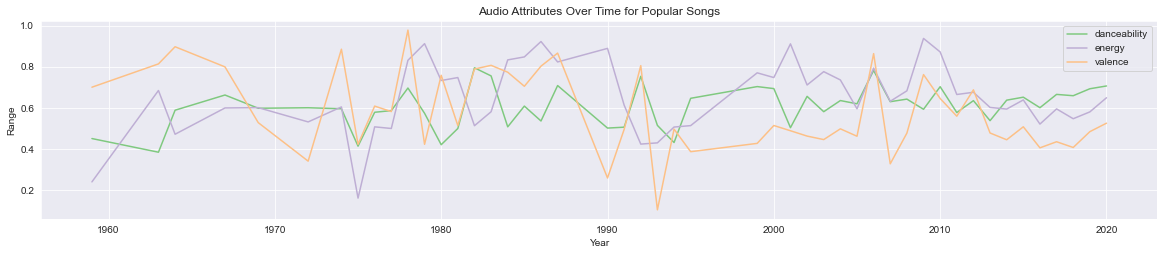

In [42]:
plt.figure(figsize = (20, 8))
sns.set_palette('Accent')
plt.subplot(2,1,1)
for attribute in audio_attributes:
    x = popular_songs.groupby("release_year")[attribute].mean()
    sns.lineplot(x=x.index,y=x,label=attribute)
    plt.title('Audio Attributes Over Time for Popular Songs')
    
plt.ylabel('Range')
plt.xlabel('Year')

<AxesSubplot:xlabel='release_year', ylabel='loudness'>

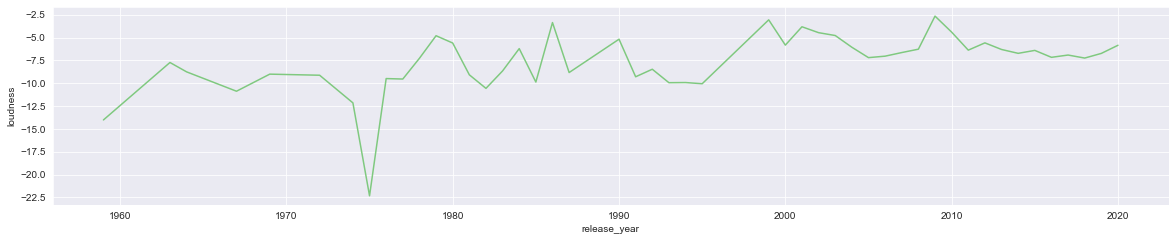

In [45]:
plt.figure(figsize = (20, 8))
plt.subplot(2,1,2)
sns.lineplot(x = popular_songs.groupby('release_year')['loudness'].mean().index, y = popular_songs.groupby('release_year')['loudness'].mean())

In [47]:
popular_songs['artists'].value_counts().nlargest(25)

['Ariana Grande']      17
['Billie Eilish']      13
['BTS']                11
['Juice WRLD']         11
['XXXTENTACION']        8
['Harry Styles']        7
['Dua Lipa']            7
['Bad Bunny']           6
['Lewis Capaldi']       6
['The Weeknd']          6
['Post Malone']         5
['Imagine Dragons']     5
['Ed Sheeran']          5
['Coldplay']            5
['Morgan Wallen']       4
['Maroon 5']            4
['One Direction']       4
['Bruno Mars']          4
['Shawn Mendes']        4
['Ava Max']             4
['Pop Smoke']           4
['J Balvin']            4
['Sam Smith']           4
['AC/DC']               4
['The Kid LAROI']       4
Name: artists, dtype: int64

In [48]:
popular_songs['artists'].value_counts().sample(30)

['CORPSE', 'Savage Ga$p']                                                 1
['Grouplove']                                                             1
['Britney Spears']                                                        1
['Lil Baby', '42 Dugg']                                                   1
['J Balvin']                                                              4
['Black Eyed Peas', 'Ozuna', 'J. Rey Soul']                               1
['Tyler, The Creator']                                                    1
['iann dior']                                                             1
['Lil Nas X']                                                             1
['21 Savage', 'Metro Boomin', 'Drake']                                    1
['AC/DC']                                                                 4
['Gabby Barrett']                                                         1
['Harry Styles']                                                          7
['Big Sean',